## Crisp Data Mining (CRISP-DM) - Unsupervised learning

### agglomerative hierarchical clustering and k-means clustering algorithms for finding patterns

The data set utilised in this exercise is a simplified and downsampled version of a knowledge discovery and data mining competition data set: https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html. The data set contains samples of network activity simulated in a military network environment. There are different types of malicious activity, and also activity that is considered normal.

In addition to normal activity, there are 3 types of malicious activity - denial of service, unauthorized remote login, and network probing (e.g. port scanning) - simulated in a military network environment. There are 500 samples of each class. There are 6 numeric features, described below:

`src_bytes`: number of bytes from source to destination\
`dst_bytes`: number of bytes from destination to source\
`duration`: length of connection (seconds)\
`count`: number of connections to the same host as the current connection in the past two seconds\
`serror_rate`: percentage of connections that have SYN errors\
`rerror_rate`: percentage of connections that have REJ errors

### Setup

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram

%matplotlib inline

### Loading the data

In [20]:
data_path = "ex3_network_data.csv" # creating file path
data = pd.read_csv(data_path) # reading the csv file into a pandas data frame
data.head() # printing the first 5 rows

,src_bytes,dst_bytes,duration,count,serror_rate,rerror_rate,class
0,0,0,0,223,1.0,0.0,denial_of_service
1,1032,0,0,511,0.0,0.0,denial_of_service
2,520,0,0,511,0.0,0.0,denial_of_service
3,1032,0,0,510,0.0,0.0,denial_of_service
4,520,0,0,448,0.0,0.0,denial_of_service


### Part 1: Preprocess and visualize the data

 - z-score standardization on the features to ensure that all features have the same scale.
 
 - Projecting the data to two dimensions by using principal component analysis (PCA) and visualize the resulting two-dimensional data in a scatter plot.

In [21]:
# selecting numeric features
numeric_features_names = ['src_bytes', 'dst_bytes', 'duration', 'count', 'serror_rate', 'rerror_rate']
# performing z-score standardization
# source https://datagy.io/python-z-score/
import scipy.stats as stats
numeric_features = stats.zscore(data[numeric_features_names])
# making sure its scaling
print(numeric_features.head())

   src_bytes  dst_bytes  duration     count  serror_rate  rerror_rate
0  -0.865773  -0.444017  -0.08373  0.563862     4.011105    -0.404417
1   1.355016  -0.444017  -0.08373  2.015840    -0.253374    -0.404417
2   0.253229  -0.444017  -0.08373  2.015840    -0.253374    -0.404417
3   1.355016  -0.444017  -0.08373  2.010798    -0.253374    -0.404417
4   0.253229  -0.444017  -0.08373  1.698219    -0.253374    -0.404417


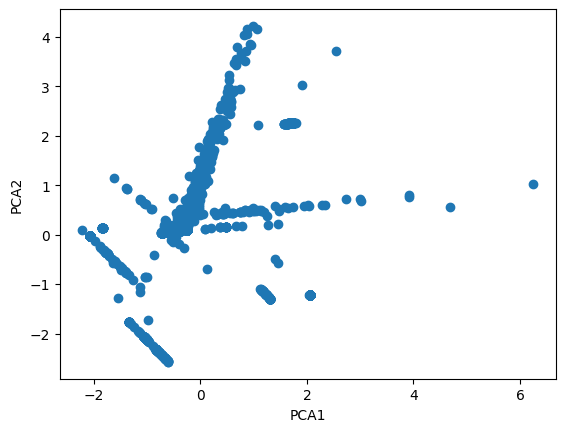

In [22]:
# source https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca = PCA(n_components=2) # creating a pca model with 2 dimentions
PCA_components = pca.fit_transform(numeric_features) # applying pca on the numeric data
# making a data frame from the pca components
PCA_Df = pd.DataFrame(data = PCA_components, columns = ['pca1', 'pca2'])
# setting labels for axes
plt.ylabel('PCA2')  
plt.xlabel('PCA1')
# plotting the scatter using component 1 and 2
plt.scatter(PCA_Df['pca1'], PCA_Df['pca2'])
plt.show()

<font color = red> They don't look like clear clusters. If I didnt know that we used 2 dimentions I would have said there are much more that 2 clusters here. They do not look like two seperated groups.

Because clustering is an unsupervised learning method, the `class` column is completely unnecessary for most of these tasks and it is not used

### Part 2a: Agglomerative hierarchical clustering
 
 - Clustering the data into 4 clusters using agglomerative hierarchical clustering.
 
 - The z-score standardized 6-dimensional data for clustering

In [23]:
numeric_features = stats.zscore(data[numeric_features_names])

# The distance between two clusters is the distance of the nearest pair between cluster1 and cluster2
clusters_single_model = AgglomerativeClustering(n_clusters=4, linkage="single")
clusters_single_model.fit(numeric_features)
score_single = silhouette_score(numeric_features, clusters_single_model.labels_)

# The distance between two clusters is the distance between the furthest pair between two clusters
clusters_complete_model = AgglomerativeClustering(n_clusters=4, linkage="complete")
clusters_complete_model.fit(numeric_features)
score_complete = silhouette_score(numeric_features, clusters_complete_model.labels_)

# The distance between two clusters is the average distance between each pair in two clusters
clusters_average_model = AgglomerativeClustering(n_clusters=4, linkage="average")
clusters_average_model.fit(numeric_features)
score_average = silhouette_score(numeric_features, clusters_average_model.labels_)

# the distance between two clusters is the sum of squared differences within pairs in clusters
clusters_ward_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clusters_ward_model.fit(numeric_features)
score_ward = silhouette_score(numeric_features, clusters_ward_model.labels_)

In [24]:
print('Silhouette Scores')
print('single method: ', score_single)
print('complete method: ', score_complete)
print('average method: ', score_average)
print('ward method: ', score_ward)

Silhouette Scores
single method:  0.7288757664397134
complete method:  0.48157598037192545
average method:  0.6241907400676748
ward method:  0.6299185426636938


<font color = red> Silhouette score calculates how much a data belongs to its cluster. The formula is mean the difference between mean nearest-cluster distance (mean of the distances between all the data in the nearest cluster and the observation) and mean intra-cluster distance (mean of the data distances inside the cluster and the observation) devided by the max between them. The ideal value is 1, and the worst is -1. if its around 0 it means clusters have overlap.

The efficiency of the algorithm in decreasing order on our data: Single, Ward, average, complete

### Part 2b: Dendrograms

 - Denndrograms for visualizing the merging processes.

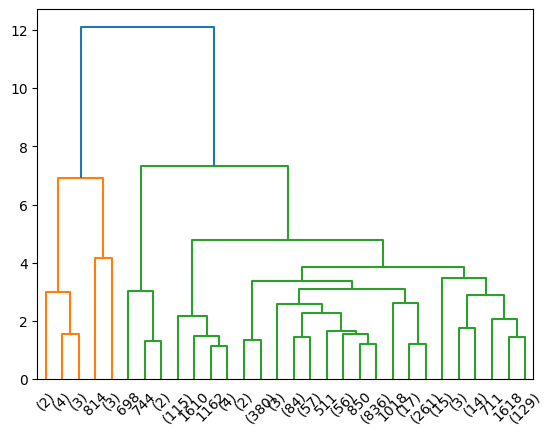

In [25]:
#creating the matrix linkage with average method
clusters_average = linkage(numeric_features, method="average")
# creating the dendrogram, lastp mode shows leaf nodes and put other data in them
dendrogram_average = dendrogram(clusters_average, truncate_mode='lastp')

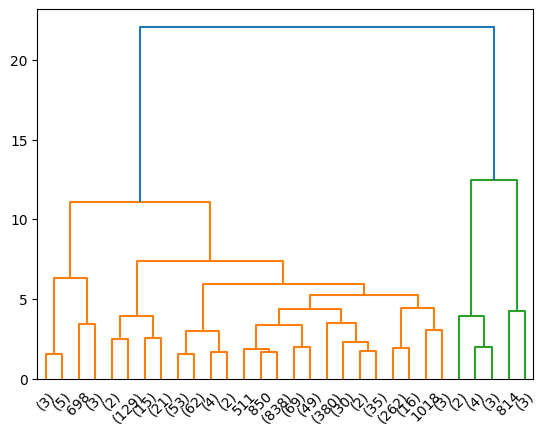

In [26]:
#creating the matrix linkage with complete method
clusters_complete = linkage(numeric_features, method="complete")
# creating the dendrogram, lastp mode shows leaf nodes and put other data in them
dendrogram_complete = dendrogram(clusters_complete, truncate_mode='lastp')

<font color = red> In the average clustering the green part contains more groups and has a higher percentage of data. But in complete a few groups in green have a higher percentage than the orange one. It seems like the average clustering is more balaned.

### Part 3: _k_-means clustering

 - _k_-means clustering on the data, 4 clusters.
 - The clustering performance is evaluated using silhouette score.

In [27]:
# creating KMeans model with 3 clusters
k3_mean_model = KMeans(n_clusters=3, random_state=42)
k3_mean_model.fit_predict(numeric_features) # fiting the model
score_k3 = silhouette_score(numeric_features, k3_mean_model.labels_) # extracting silhouette score

In [28]:
# creating KMeans model with 2 clusters
k2_mean_model = KMeans(n_clusters=2, random_state=42)
k2_mean_model.fit_predict(numeric_features) # fiting the model
score_k2 = silhouette_score(numeric_features, k2_mean_model.labels_) # extracting silhouette score

In [29]:
# creating KMeans model with 4 clusters
k4_mean_model = KMeans(n_clusters=4, random_state=42)
k4_mean_model.fit_predict(numeric_features) # fiting the model
score_k4 = silhouette_score(numeric_features, k4_mean_model.labels_) # extracting silhouette score

In [30]:
# creating KMeans model with 5 clusters
k5_mean_model = KMeans(n_clusters=5, random_state=42)
k5_mean_model.fit_predict(numeric_features) # fiting the model
score_k5 = silhouette_score(numeric_features, k5_mean_model.labels_) # extracting silhouette score

In [31]:
print('Silhouette Scores')
print('clusters = 2, ', score_k2)
print('clusters = 3, ', score_k3)
print('clusters = 4, ', score_k4)
print('clusters = 5, ', score_k5)

Silhouette Scores
clusters = 2,  0.4210817924927892
clusters = 3,  0.5419542961632046
clusters = 4,  0.634040977469723
clusters = 5,  0.6581598820518922


<font color = red> According to silhouette score clustering data into 4,5 groups has a better fitting than 3.

###  Part 4a: Compare the clusters with the true labels (hierarchical clustering)

/tmp/ipykernel_3788/3033583342.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


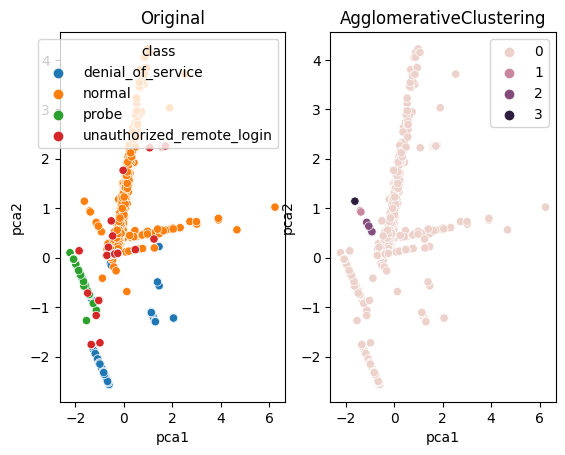

In [32]:
fig, ax =plt.subplots(1,2) # creating fig with 2 subplots
# clustering data into 4 clusters using agglomerative hierarchical clustering
clusters_single_model = AgglomerativeClustering(n_clusters=4, linkage="single")
clusters_single_model.fit(numeric_features)
score_single = silhouette_score(numeric_features, clusters_single_model.labels_)
pca = PCA(n_components=2) # creating a pca model with 2 dimentions
PCA_components = pca.fit_transform(numeric_features) # applying pca on the numeric data
# making a data frame from the pca components
PCA_Df = pd.DataFrame(data = PCA_components, columns = ['pca1', 'pca2'])
import seaborn as sns
# ploting scatter with sns based on class colors
sns.scatterplot(x=PCA_Df['pca1'],y=PCA_Df['pca2'],hue=data['class'], ax=ax[0]).set_title('Original')

pred = clusters_single_model.labels_ # using pred labels
sns.scatterplot(x=PCA_Df['pca1'],y=PCA_Df['pca2'], ax=ax[1]
                ,hue=pred).set_title('AgglomerativeClustering')

fig.show()

In [33]:
adjusted_rand_score(data['class'],pred)

0.00011807828578910034

<font color = red> based on scatters, the clustering is not efficient. Two groups have only 1 member. Overally we are putting the whole data inside 1 cluster.

based on rand score our clustering is very poor. the rand score can be from 0 to 1, showing how much two clusterings are the same. Our value is very close to 0.

### Part 4b: Compare the clusters with true labels (_k_-means clustering)

Text(0.5, 1.0, 'AgglomerativeClustering')

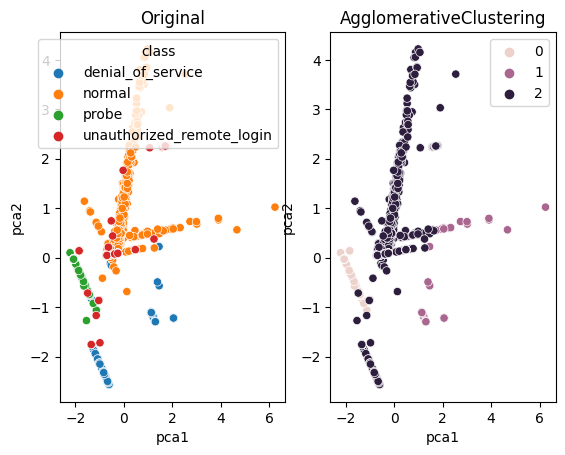

In [34]:
fig, ax =plt.subplots(1,2) # creating fig with 2 subplots
# creating KMeans model with 3 clusters
k3_mean_model = KMeans(n_clusters=3, random_state=42)
k3_mean_model.fit_predict(numeric_features) # fiting the model
score_k3 = silhouette_score(numeric_features, k3_mean_model.labels_) # extracting silhouette score
pca = PCA(n_components=2) # creating a pca model with 2 dimentions
PCA_components = pca.fit_transform(numeric_features) # applying pca on the numeric data
# making a data frame from the pca components
PCA_Df = pd.DataFrame(data = PCA_components, columns = ['pca1', 'pca2'])
import seaborn as sns
# ploting scatter with sns based on class colors
sns.scatterplot(x=PCA_Df['pca1'],y=PCA_Df['pca2'],hue=data['class'], ax=ax[0]).set_title('Original')

pred = k3_mean_model.labels_ # using pred labels
sns.scatterplot(x=PCA_Df['pca1'],y=PCA_Df['pca2']
                , hue=pred, ax=ax[1]).set_title('AgglomerativeClustering')

In [35]:
adjusted_rand_score(data['class'], pred)

0.2226723609345596

<font color = red> based on rand scores, KMean is more efficient. Also based on the scatters, KMean can recogze prob group with minor error. Agglomerative Clustering could not figure out a single group.